In [139]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import StandardScaler
from jcopml.pipeline import num_pipe, cat_pipe
from jcopml.utils import save_model, load_model
from jcopml.plot import plot_missing_value
from jcopml.feature_importance import mean_score_decrease

In [140]:
df = sns.load_dataset("penguins")
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


In [141]:
df.shape

(344, 7)

In [142]:
df.describe()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,200.915205,4201.754386
std,5.459584,1.974793,14.061714,801.954536
min,32.100000,13.100000,172.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


In [143]:
df.isna().sum()

species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
dtype: int64

In [144]:
df.shape

(344, 7)

In [145]:
df = df.dropna()

In [146]:
print(len(df))

333


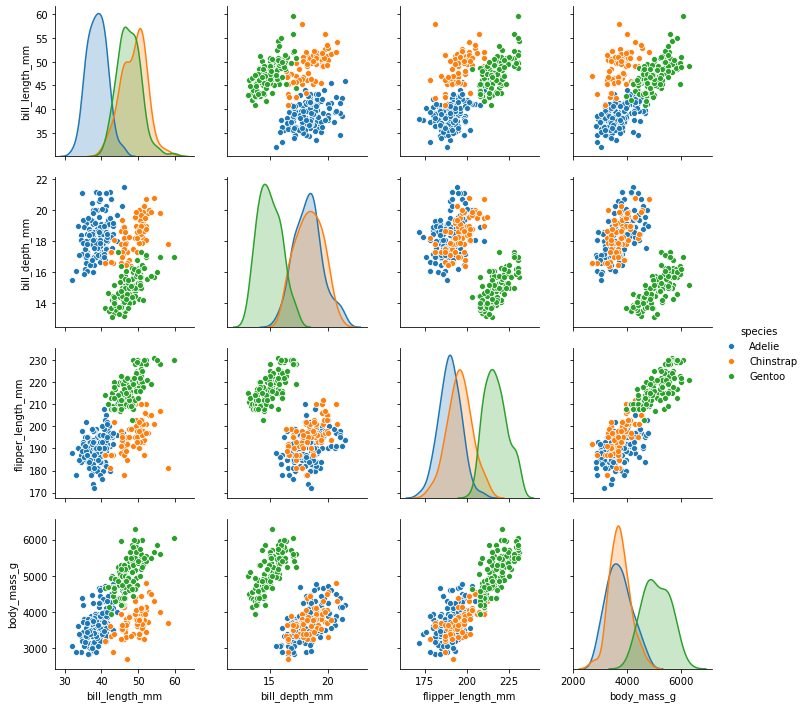

In [147]:
# Plotting our penguin species features
sns.pairplot(df, hue='species')
plt.show()

In [148]:
#Split data
X = df[['bill_length_mm', 'bill_depth_mm']]
y = df['species']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25 ,random_state=42, )

In [149]:
# Building and training our model
clf = SVC(kernel='linear')
clf.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [150]:
# Making predictions with our data
predictions = clf.predict(X_test)
print(predictions[:5])

['Adelie' 'Gentoo' 'Adelie' 'Chinstrap' 'Adelie']


# Plot tanpa Kelas Gentoo

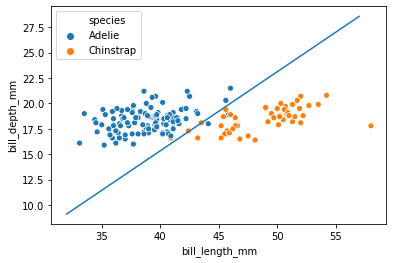

bill_length_mm    58.0
bill_depth_mm     21.5
dtype: float64


In [151]:
df = sns.load_dataset('penguins')
df = df.dropna()
df = df[df['species'] != "Gentoo"] 

X = df[['bill_length_mm', "bill_depth_mm"]]
y = df['species']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

clf= SVC(kernel='linear')
clf.fit(X_train, y_train)

# Visualizing the linear function for our SVM classifier
import numpy as np
from seaborn import scatterplot
w = clf.coef_[0]
b = clf.intercept_[0]
x_visual = np.linspace(32, 57)

y_visual = -(w[0] / w[1]) * x_visual - b / w[1]

scatterplot(data = X_train, x='bill_length_mm', y='bill_depth_mm', hue=y_train)
plt.plot(x_visual, y_visual)
plt.show()
print(X_train.max())

In [152]:
predictions = clf.predict(X_test)
print(accuracy_score(y_test, predictions))

0.9629629629629629


# One Hot Encoding

In [153]:
def get_column_names_from_ColumnTransformer(column_transformer):    
    col_name = []

    for transformer_in_columns in column_transformer.transformers_[:-1]: #the last transformer is ColumnTransformer's 'remainder'
        print('\n\ntransformer: ', transformer_in_columns[0])
        
        raw_col_name = list(transformer_in_columns[2])
        
        if isinstance(transformer_in_columns[1], Pipeline): 
            # if pipeline, get the last transformer
            transformer = transformer_in_columns[1].steps[-1][1]
        else:
            transformer = transformer_in_columns[1]
            
        try:
          if isinstance(transformer, OneHotEncoder):
            names = list(transformer.get_feature_names(raw_col_name))
            
          elif isinstance(transformer, SimpleImputer) and transformer.add_indicator:
            missing_indicator_indices = transformer.indicator_.features_
            missing_indicators = [raw_col_name[idx] + '_missing_flag' for idx in missing_indicator_indices]

            names = raw_col_name + missing_indicators
            
          else:
            names = list(transformer.get_feature_names())
          
        except AttributeError as error:
          names = raw_col_name
        
        print(names)    
        
        col_name.extend(names)
            
    return col_name

In [154]:
df = sns.load_dataset('penguins')
df = df.dropna()


X = df.drop(columns = ['species'])
y = df['species']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)


column_transformer = make_column_transformer(
    (OneHotEncoder(), ['sex', 'island']))



X_train = column_transformer.fit_transform(X_train)
X_train = pd.DataFrame(data=X_train, columns=get_column_names_from_ColumnTransformer(column_transformer))
print(X_train)



transformer:  onehotencoder
['sex_FEMALE', 'sex_MALE', 'island_Biscoe', 'island_Dream', 'island_Torgersen']
     sex_FEMALE  sex_MALE  island_Biscoe  island_Dream  island_Torgersen
0           0.0       1.0            1.0           0.0               0.0
1           1.0       0.0            1.0           0.0               0.0
2           0.0       1.0            0.0           1.0               0.0
3           1.0       0.0            1.0           0.0               0.0
4           0.0       1.0            0.0           1.0               0.0
..          ...       ...            ...           ...               ...
244         0.0       1.0            0.0           1.0               0.0
245         0.0       1.0            0.0           0.0               1.0
246         1.0       0.0            1.0           0.0               0.0
247         0.0       1.0            1.0           0.0               0.0
248         1.0       0.0            1.0           0.0               0.0

[249 rows x 5

In [155]:
print(X_train.iloc[:5, :4])

   sex_FEMALE  sex_MALE  island_Biscoe  island_Dream
0         0.0       1.0            1.0           0.0
1         1.0       0.0            1.0           0.0
2         0.0       1.0            0.0           1.0
3         1.0       0.0            1.0           0.0
4         0.0       1.0            0.0           1.0


# Standard Scaler

In [156]:
df = sns.load_dataset('penguins')
df = df.dropna()


X = df.drop(columns = ['species'])
y = df['species']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)




column_transformer = make_column_transformer(
    (OneHotEncoder(), ['sex', 'island']),
    (StandardScaler(), ['bill_depth_mm', 'bill_length_mm', 'flipper_length_mm', 'body_mass_g']))



# categoryColumn = np.array(column_transformer.transformers[0][2])  
# numericColumn =  np.append(categoryColumn, column_transformer.transformers[1][2])


X_train = column_transformer.fit_transform(X_train)

print(X_train)
# X_train = pd.DataFrame(data=X_train, columns=numericColumn)

[[ 0.          1.          1.         ...  2.15997658  1.94294582
   1.70547554]
 [ 1.          0.          1.         ... -0.12149682  1.14806478
   0.84390207]
 [ 0.          1.          0.         ... -1.01182791 -0.80300688
  -0.32537621]
 ...
 [ 1.          0.          1.         ... -0.84489083 -0.58622114
  -1.24849065]
 [ 0.          1.          1.         ...  0.2309259   1.36485052
   0.966984  ]
 [ 1.          0.          1.         ... -1.14166785 -1.4533641
  -1.27926113]]


# Menemukan best hyper parameter

In [157]:
from sklearn.model_selection import GridSearchCV
from jcopml.tuning import grid_search_params as gsp


In [158]:
params = {
    'C': [0.1, 1, 10, 100, 1000],
    'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
    'kernel': ['rbf']
}

clf = GridSearchCV(
    estimator=SVC(),
    param_grid=params,
    cv=5,
    n_jobs=5,
    verbose=1
)


clf.fit(X_train, y_train)
print(clf.best_params_)

Fitting 5 folds for each of 25 candidates, totalling 125 fits


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.


{'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}


[Parallel(n_jobs=5)]: Done  45 tasks      | elapsed:    3.6s
[Parallel(n_jobs=5)]: Done 125 out of 125 | elapsed:    3.7s finished


In [159]:
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,MALE


In [160]:
X = df.drop(columns="species")
y = df.species

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((266, 6), (67, 6), (266,), (67,))

In [161]:
preprocessor = ColumnTransformer([
    ('numeric', num_pipe(scaling='standard'), ["bill_length_mm", "bill_depth_mm", "flipper_length_mm", "body_mass_g"]),
    ('categoric', cat_pipe(encoder='onehot'), ["island", "sex"]),
])

pipeline = Pipeline([
    ('prep', preprocessor),
    ('algo', SVC(kernel='rbf'))
])

model = GridSearchCV(pipeline, gsp.svm_params , cv=3,n_jobs=-1, verbose=1)
model.fit(X_train, y_train)

print(model.best_params_)
print(model.score(X_train, y_train), model.best_score_, model.score(X_test, y_test))

Fitting 3 folds for each of 49 candidates, totalling 147 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  93 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done 136 out of 147 | elapsed:    1.3s remaining:    0.0s


{'algo__C': 1.0, 'algo__gamma': 0.1}
0.9962406015037594 0.9962121212121212 1.0


[Parallel(n_jobs=-1)]: Done 147 out of 147 | elapsed:    3.1s finished


In [162]:

# X_test = preprocessor.fit_transform(X_test)

# X_test = pd.DataFrame(data=X_test, columns=["bill_length_mm", "bill_depth_mm", "flipper_length_mm", "body_mass_g", 'island_Biscoe', 'island_Dream', 'island_Torgersen','sex_FEMALE', 'sex_MALE'])

predictions=model.predict(X_test)

print(accuracy_score(y_test, predictions))


1.0


In [163]:
df['species_predict'] = model.predict(X)
df

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,species_predict
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE,Adelie
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE,Adelie
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE,Adelie
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE,Adelie
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,MALE,Adelie
...,...,...,...,...,...,...,...,...
338,Gentoo,Biscoe,47.2,13.7,214.0,4925.0,FEMALE,Gentoo
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,FEMALE,Gentoo
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,MALE,Gentoo
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,FEMALE,Gentoo


# plot model

In [164]:
model.best_estimator_.named_steps['algo'].dual_coef_ .shape

(2, 47)

In [165]:
from sklearn.decomposition import PCA

In [166]:
X

,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
4,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
5,Torgersen,39.3,20.6,190.0,3650.0,MALE
...,...,...,...,...,...,...
338,Biscoe,47.2,13.7,214.0,4925.0,FEMALE
340,Biscoe,46.8,14.3,215.0,4850.0,FEMALE
341,Biscoe,50.4,15.7,222.0,5750.0,MALE
342,Biscoe,45.2,14.8,212.0,5200.0,FEMALE


In [167]:
X_new = X.iloc[:, 1:3]
y

0      Adelie
1      Adelie
2      Adelie
4      Adelie
5      Adelie
        ...  
338    Gentoo
340    Gentoo
341    Gentoo
342    Gentoo
343    Gentoo
Name: species, Length: 333, dtype: object

In [168]:
from matplotlib.colors import ListedColormap

In [171]:
X_train

,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
268,Biscoe,44.9,13.3,213.0,5100.0,FEMALE
205,Dream,50.7,19.7,203.0,4050.0,MALE
337,Biscoe,48.8,16.2,222.0,6000.0,MALE
123,Torgersen,41.4,18.5,202.0,3875.0,MALE
38,Dream,37.6,19.3,181.0,3300.0,FEMALE
...,...,...,...,...,...,...
24,Biscoe,38.8,17.2,180.0,3800.0,MALE
201,Dream,49.8,17.3,198.0,3675.0,FEMALE
43,Dream,44.1,19.7,196.0,4400.0,MALE
255,Biscoe,48.4,16.3,220.0,5400.0,MALE


ValueError: Number of features of the input must be equal to or greater than that of the fitted transformer. Transformer n_features is 6 and input n_features is 2.

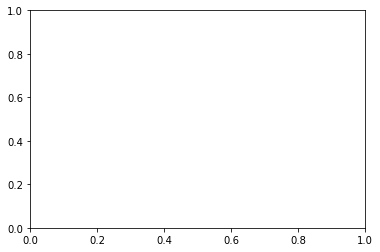

In [170]:
# #Buat mesh to di plot
# x_min, x_max = X_new.iloc[:, 0].min() - 1, X_new.iloc[:, 0].max() + 1
# y_min, y_max = X_new.iloc[:, 1].min() - 1, X_new.iloc[:, 1].max() + 1

# h = (x_max / x_min) / 100


# xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
#                     np.arange(y_min, y_max, h))

# #Plot data
# plt.subplot(1, 1, 1)
# Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
# Z = Z.reshape(xx.shape)
# plt.contourf(xx, yy, Z, cmap= ListedColormap(('blue', 'green', 'gray')), alpha=0.8)
# plt.scatter(X[:, 0], X[:, 1], c = y, cmap=plt.cm.Paired)
# plt.xlabel('First_feature')
# plt.ylabel('Second_Feature')
# plt.xlim(xx.min(), xx.max())
# plt.title('SVC with kernel rbf')
# plt.show()